# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Mohammad Rahimi 
2.   Student Number: 99206044 


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [3]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [4]:

dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL2022-HW1/data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

x_train = dataset['X'][:int(dataset.shape[0]*0.8)].to_numpy().reshape(-1,1)
y_train = dataset['Y'][:int(dataset.shape[0]*0.8)].to_numpy().reshape(-1,1)

x_test = dataset['X'][int(dataset.shape[0]*0.8):].to_numpy().reshape(-1,1)
y_test = dataset['Y'][int(dataset.shape[0]*0.8):].to_numpy().reshape(-1,1)

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [5]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A = np.hstack((x_train,np.ones((x_train.shape[0],1))))
m = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),y_train)

In [6]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = np.linalg.norm(predicted_train_y - y_train)**2/(x_train.shape[0])
test_error = np.linalg.norm(predicted_test_y - y_test)**2/(x_test.shape[0])


print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3246776301777423
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

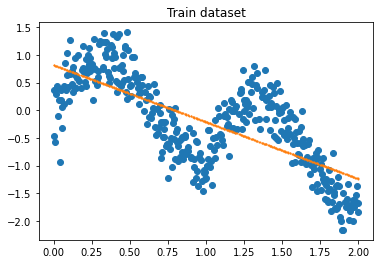

In [7]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

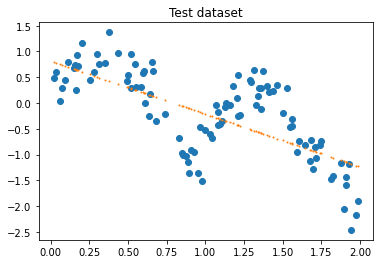

In [8]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

The reported accuracies acceptable are not acceptable as the error 0.35 is considerable compared to values of $y_{train}$
The behavior of the dataset we have does not seem possible to be described by a line. Therefore, we must find a more complex model to fit this dataset. A non-linear model might do better.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do we expect it performs better than simple `Linear Regression` for this dataset?

Yes, given that the dataset shows linear behavior in specific regions, we expect this model to have more accuracy. As the data is non-linear we need to fit a curved line so that our error is minimized.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [9]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-1*np.dot((xi-the_query_point),(xi-the_query_point).T).astype(float)/(2*hyperparameter**2))
    return W

In [10]:
a=np.array([1 ,2])
b=np.array([1 ,2])
np.exp(1)

2.718281828459045

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [11]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.dot(np.dot(np.dot(np.linalg.inv(np.dot(np.dot(X.T,W),X)),X.T),W),train_Y)

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [12]:
hyperparameter = 0.01
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
predicted_test = np.array(predicted_test)[:,0]

error = np.linalg.norm(predicted_test - y_test)**2/(y_test.shape[0])
print(f"MSE test error: {error}")

/usr/local/lib/python3.7/dist-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


MSE test error: [0.09575447]


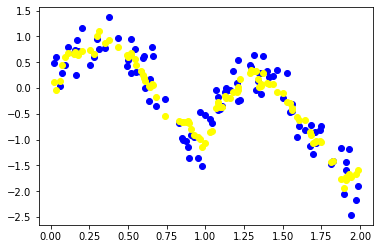

In [13]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes, for linear regression model we had MSE test error of 0.35 but using this model it decreased to 0.095. The reason for this better performance is that this model considers the non-linearity of the dataset.
While computing $\theta$, a higher preference is given to the points in the training set lying in the vicinity of x than the points lying far away from x.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Due to the non-linear relation between X and Y we expext the KNN apprach outperform linear regression.

### Part10:
Implementing the `KNN model`.

In [14]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.dot(x1-x2 , x1-x2 ) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        indices = np.argsort(np.array([self.distance(xt,x) for xt in self.X]),axis = 0)[:self.k] # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        nearest_indices = self.return_nn_ids(x)
        predicted_y = self.Y[nearest_indices].mean()
        return predicted_y

In [15]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = np.linalg.norm((y_test-np.array(predicted_y).reshape(-1,1)))**2/y_test.shape[0]
    return error, predicted_y

In [16]:
k = 19
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09687363389746839


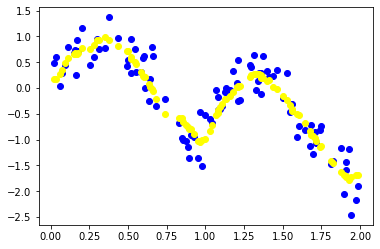

In [17]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

It performs better than linear regression but still does not have the accuracy provided by Locally Weighted Linear Regression.